(NVM)=

# 1.3 Normas vectoriales y matriciales

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/5bc6tn39o0qqg35/1.3.Condicion_estabilidad_y_normas.pdf?dl=0)

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Aprenderá las definiciones de algunas normas vectoriales y matriciales más utilizadas en las Matemáticas para la medición de errores, residuales, en general cercanía a cantidades de interés.

* Comprenderá la interpretación que tiene una norma matricial.

```

Una norma define una medida de distancia en un conjunto y da nociones de tamaño, vecindad, convergencia y continuidad.

## Normas vectoriales

Sea $\mathbb{R}^n$ el conjunto de $n$-tuplas o vectores columna o $1$-arreglo de orden $1$, esto es:

$$x \in \mathbb{R}^n \iff x = \left[\begin{array}{c}
    x_1\\
    x_2\\
    \vdots\\
    x_n
    \end{array} \right] \text{ con } x_i \in \mathbb{R}$$
 

Una norma vectorial en $\mathbb{R}^n$ es una función $g: \mathbb{R}^n \rightarrow \mathbb{R}$ que satisface las siguientes propiedades:

* $g$ es no negativa: $g(x) \geq 0 \forall x \in \mathbb{R}^n$.

* $g$ es definida: $g(x) = 0 \iff x = 0$.

* $g$ satisface la desigualdad del triángulo: 

$$g(x+y) \leq g(x) + g(y) \forall x,y \in \mathbb{R}^n.$$


* $g$ es homogénea: $g(\alpha x)=|\alpha|g(x), \forall \alpha \in \mathbb{R}, \forall x \in \mathbb{R}^n$.

Notación: $g(x) = ||x||$.

```{admonition} Definición

Un conjunto $V \neq \emptyset$ en el que se le han definido las operaciones $(+, \cdot)$ se le nombra **espacio vectorial** sobre $\mathbb{R}$ si satisface las siguientes propiedades $\forall x, y, z \in V$, $\forall a,b \in \mathbb{R}$:

* x + (y + z) = (x + y) + z
* x + y = y + x
* $\exists 0 \in V$ tal que $x + 0 = 0 + x = x$ $\forall x \in V$.
* $\forall x \in V$ $\exists -x \in V$ tal que $x + (-x) = 0$.
* a(bx) = (ab)x.
* $1x = x$ con $1 \in \mathbb{R}$.
* $a(x + y) = ax + ay$.
* $(a+b)x = ax + bx$.
```

```{admonition} Comentarios y propiedades

* Una norma es una generalización del valor absoluto de $\mathbb{R}$: $|x|, x \in \mathbb{R}.$

* Un espacio vectorial con una norma definida en éste se le llama **espacio vectorial normado**.

* Una norma es una medida de la longitud de un vector.

* Con una norma es posible definir conceptos como distancia entre vectores: $x,y \in \mathbb{R}^n: \text{dist}(x,y) = ||x-y||$.

* Existen varias normas en $\mathbb{R}^n$ siendo las más comunes:

 * La norma $\mathcal{l}_2$, Euclidiana o norma $2$: $||x||_2$.
 
 * La norma $\mathcal{l}_1$ o norma $1$: $||x||_1$.
 
 * La norma $\infty$ o de Chebyshev o norma infinito: $||x||_\infty$.
 
 Las normas anteriores pertenecen a una familia parametrizada por una constante $p, p \geq 1$ cuyo nombre es norma $\mathcal{l}_p$:
 
 $$ ||x||_p = \left(\displaystyle \sum_{i=1}^n|x_i|^p \right )^{1/p}.$$
 

* Un resultado para $x \in \mathbb{R}^n$ es la **equivalencia** entre normas:

$$\exists \alpha, \beta > 0  \text{ tales que }: \alpha||x||_a \leq ||x||_b \leq \beta ||x||_a \forall x \in \mathbb{R}^n$$ 

donde: $||\cdot||_a, ||\cdot||_b$ son normas cualesquiera en $\mathbb{R}^n$. Por la propiedad anterior decimos que si se cumple convergencia en la norma $||\cdot||_a$ entonces también se cumple convergencia en la norma $||\cdot||_b$.
```

(EGNP)=

## Ejemplos de gráficas de normas en el plano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Norma $2$: $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_2 \leq 1\}$

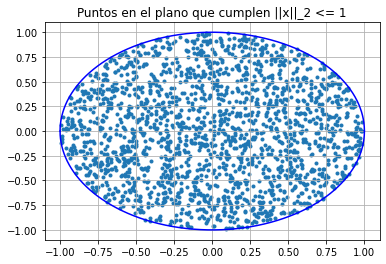

In [2]:
f=lambda x: np.sqrt(x[:,0]**2 + x[:,1]**2) #definición de norma2
density=1e-5
density_p=int(2.5*10**3)
x=np.arange(-1,1,density)
y1=np.sqrt(1-x**2)
y2=-np.sqrt(1-x**2)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x,y1,'b',x,y2,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_2 <= 1')
plt.grid()
plt.show()

### Norma $1$:  $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_1 \leq 1\}$

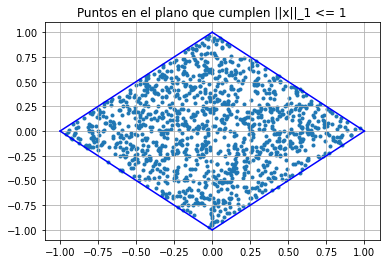

In [3]:
f=lambda x:np.abs(x[:,0]) + np.abs(x[:,1]) #definición de norma1
density=1e-5
density_p=int(2.5*10**3)
x1=np.arange(0,1,density)
x2=np.arange(-1,0,density)
y1=1-x1
y2=1+x2
y3=x1-1
y4=-1-x2
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x1,y1,'b',x2,y2,'b',x1,y3,'b',x2,y4,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_1 <= 1')
plt.grid()
plt.show()

### Norma $\infty$:  $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_\infty < 1\}$

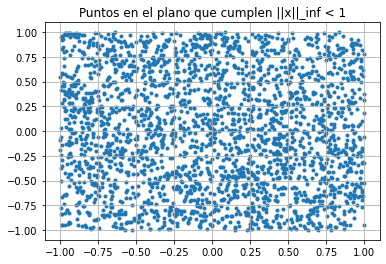

In [4]:
f=lambda x:np.max(np.abs(x),axis=1) #definición de norma infinito
density_p=int(2.5*10**3)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_inf < 1')
plt.grid()
plt.show()

```{admonition} Observación
:class: tip

La norma $\infty$ se encuentra en la familia de las normas-p como límite: 

$$||x||_\infty = \displaystyle \lim_{p \rightarrow \infty} ||x||_p.$$

```

```{admonition} Comentario

En la norma $\mathcal{l}_2$ o Euclidiana $||x||_2$ tenemos una desigualdad muy importante, la desigualdad de **Cauchy-Schwartz**:

$$|x^Ty| \leq ||x||_2||y||_2 \forall x,y \in \mathbb{R}^n$$

la cual relaciona el producto interno estándar para $x,y \in \mathbb{R}^n$: $<x,y> = x^Ty = \displaystyle \sum_{i=1}^nx_iy_i$ con la norma $\mathcal{l}_2$ de $x$ y la norma $\mathcal{l}_2$ de $y$. Además se utiliza lo anterior para definir el ángulo (sin signo por el intervalo en el que está $\cos^{-1}$) entre $x,y$: 

$$\measuredangle x,y = \cos ^{-1}\left(\frac{x^Ty}{||x||_2||y||_2} \right )$$

para $\cos^{-1}(u) \in [0,\pi]$ y se nombra a $x,y$ ortogonales si $x^Ty=0$. Obsérvese que $||x||_2 = \sqrt{x^Tx}$.

```

- La ventaja de esta desigualdad nos sirve mucho para definir la distancia entre dos vectores

### Ejemplo

También se utilizan matrices para definir normas.

```{admonition} Definición

Recuérdese que una matriz es un arreglo $2$-dimensional de datos o $2$ arreglo de orden $2$. Se utiliza la notación $A \in \mathbb{R}^{m\times n}$ para denotar:


$$A = \left[\begin{array}{cccc}
a_{11} &a_{12}&\dots&a_{1n}\\
a_{21} &a_{22}&\dots&a_{2n}\\
\vdots &\vdots& \vdots&\vdots\\
a_{n1} &a_{n2}&\dots&a_{nn}\\
\vdots &\vdots& \vdots&\vdots\\
a_{m-11} &a_{m-12}&\dots&a_{m-1n}\\
a_{m1} &a_{m2}&\dots&a_{mm}
\end{array}
\right] 
$$

con $a_{ij} \mathbb{R} \forall i=1,\dots,m, j=1,\dots,n$. Y se utilizan las siguientes notaciones para describir a la matriz $A$:

* $A=(a_1,\dots a_n), a_j \in \mathbb{R}^m (=\mathbb{R}^{m\times1}) \forall j=1,\dots,n$.

* $A=\left ( \begin{array}{c}
a_1^T\\
\vdots\\
a_m^T
\end{array} \right ), a_i \in \mathbb{R}^n (=\mathbb{R}^{n\times1}) \forall i=1,\dots,m$.

La multiplicación de una matriz de tamaño $m\times n$ por un vector se define como:

$$y=Ax=\displaystyle \sum_{j=1}^n a_jx_j$$

con $a_j \in \mathbb{R}^m, x \in \mathbb{R}^n$. Obsérvese que $x \in \mathbb{R}^n, Ax \in \mathbb{R}^m$.

```

Un ejemplo de norma-$2$ ponderada es: $\{x \in \mathbb{R}^2 \text{ tales que } ||x||_D \leq 1, ||x||_D = ||Dx||_2, \text{con matriz diagonal } D \text{ y entradas positivas}\}$:  

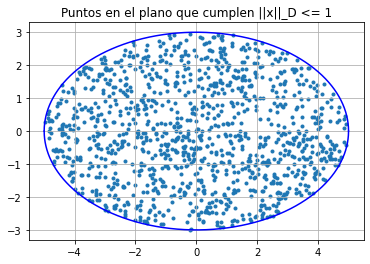

In [5]:
d1_inv=1/5
d2_inv=1/3
f=lambda x: np.sqrt((d1_inv*x[:,0])**2 + (d2_inv*x[:,1])**2) #definición de norma2
density=1e-5
density_p=int(2.5*10**3)
x=np.arange(-1/d1_inv,1/d1_inv,density)
y1=1.0/d2_inv*np.sqrt(1-(d1_inv*x)**2)
y2=-1.0/d2_inv*np.sqrt(1-(d1_inv*x)**2)
x_p=np.random.uniform(-1/d1_inv,1/d1_inv,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x,y1,'b',x,y2,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_D <= 1')
plt.grid()
plt.show()

en este caso $D=\left[\begin{array}{cc} \frac{1}{25} &0\\ 0 &\frac{1}{9} \end{array}\right ] =  \left[\begin{array}{cc} \frac{1}{d_1} &0\\ 0 &\frac{1}{d_2} \end{array}\right ]$

(NMAT)=

## Normas matriciales

### Inducidas

De las normas matriciales más importantes se encuentran las **inducidas** por normas vectoriales. Estas normas matriciales se definen en términos de los vectores en $\mathbb{R}^n$ a los que se les aplica la multiplicación $Ax$:

Dadas las normas vectoriales $||\cdot||_{(n)}, ||\cdot||_{(m)}$ en $\mathbb{R}^n$ y $\mathbb{R}^m$ respectivamente, la norma matricial inducida $||A||_{(m,n)}$ para $A \in \mathbb{R}^{m \times n}$ es el **menor número** $C$ para el cual la desigualdad: 

$$||Ax||_{(m)} \leq C||x||_{(n)}$$

se cumple $\forall x \in \mathbb{R}^n$. Esto es:

$$||A||_{(m,n)} = \displaystyle \sup_{x \in \mathbb{R}^n} \frac{||Ax||_{(m)}}{||x||_{(n)}}$$

Ver {ref}`Nota sobre sup e inf <SI>` para definición de $\sup$.

- El supremo es un cociente de números.
- Si calculamos el supremo nos da el menor número sobre el cual se satisface la desigualdad.

```{admonition} Comentarios

* $||A||_{(m,n)}$ representa el **máximo** factor por el cual $A$ puede modificar el tamaño de $x$ sobre todos los vectores $x \in \mathbb{R}^n$, es una medida de un tipo de **worst case stretch factor**.

* Así definidas, la norma $||\cdot||_{(m,n)}$ es la norma matricial inducida por las normas vectoriales $||\cdot||_{(m)}, ||\cdot||_{(n)}$.

* Son definiciones equivalentes:

$$||A||_{(m,n)} = \displaystyle \sup_{x \in \mathbb{R}^n} \frac{||Ax||_{(m)}}{||x||_{(n)}} = \displaystyle \sup_{||x||_{(n)} \leq 1} \frac{||Ax||_{(m)}}{||x||_{(n)}} = \displaystyle \sup_{||x||_{(n)}=1} ||Ax||_{(m)}$$

```

### Ejemplo

La matriz $A=\left[\begin{array}{cc}
1 &2\\
0 &2
\end{array}\right ]$ mapea $\mathbb{R}^2$ a $\mathbb{R}^2$, en particular se tiene:

* $A$ mapea $e_1 = \left[\begin{array}{c}
1 \\
0
\end{array}\right ]$ a la columna $a_1 = \left[\begin{array}{c}
1 \\
0
\end{array}\right ]$ de $A$.

* $A$ mapea $e_2 = \left[\begin{array}{c}
0 \\
1
\end{array}\right ]$ a la columna $a_2 = \left[\begin{array}{c}
2 \\
2
\end{array}\right ]$ de $A$.

Considerando $||A||_p := ||A||_{(p,p)}$ con $p=1, p=2, p=\infty$ se tiene:

<img src="https://dl.dropboxusercontent.com/s/3fqz9uspfwdurjf/normas_matriciales.png?dl=0" heigth="500" width="500">



- Lo que hace la "columna" de en medio es aplicar la matriz "A".
- Aquí lo que estamos intentando hacer es representar el *supremo* en su última representación.
- El vector que tenga su máxima deformación bajo la matriz dada va a ser el supremo. Finalmente será la norma matricial.
- El valor máximo de la norma 2 será especial.

```{admonition} Observación
:class: tip

Al observar la segunda gráfica se tiene la siguiente afirmación: la acción de una matriz sobre una circunferencia es una elipse con longitudes de semiejes iguales a $|d_i|$. En general la acción de una matriz sobre una hiper esfera es una hiperelipse. Por lo que los vectores unitarios en $\mathbb{R}^n$ que son más amplificados por la acción de una matriz diagonal $D \in \mathbb{R}^{m\times n}$ con entradas iguales a $d_i$ son aquellos que se mapean a los semiejes de una hiperelipse en $\mathbb{R}^m$ de longitud  igual a $\max\{|d_i|\}$ y así tenemos: si $D$ es una matriz diagonal con entradas $d_i$ entonces $||D||_2 = \displaystyle \max_{i=1,\dots,m}\{|d_i|\}$. 

```

### Ejemplo

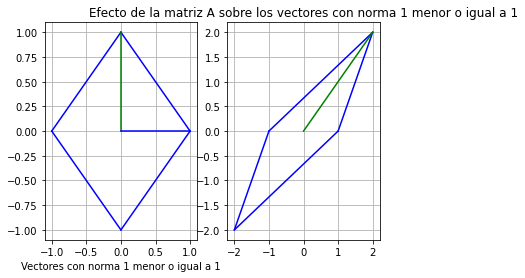

In [8]:
A=np.array([[1,2],[0,2]])
density=1e-5
x1=np.arange(0,1,density)
x2=np.arange(-1,0,density)
x1_y1 = np.column_stack((x1,1-x1))
x2_y2 = np.column_stack((x2,1+x2))
x1_y3 = np.column_stack((x1,x1-1))
x2_y4 = np.column_stack((x2,-1-x2))
apply_A = lambda vec : np.transpose(A@np.transpose(vec))
A_to_vector_1 = apply_A(x1_y1)
A_to_vector_2 = apply_A(x2_y2)
A_to_vector_3 = apply_A(x1_y3)
A_to_vector_4 = apply_A(x2_y4)
plt.subplot(1,2,1)
plt.plot(x1_y1[:,0],x1_y1[:,1],'b',
         x2_y2[:,0],x2_y2[:,1],'b',
         x1_y3[:,0],x1_y3[:,1],'b',
         x2_y4[:,0],x2_y4[:,1],'b')
e1 = np.array([[0,0],
               [1, 0]])
e2 = np.array([[0, 0],
               [0, 1]])
plt.plot(e2[:,0], e2[:,1],'g',
         e1[:,0], e1[:,1],'b')
plt.xlabel('Vectores con norma 1 menor o igual a 1')
plt.grid()
plt.subplot(1,2,2)
plt.plot(A_to_vector_1[:,0],A_to_vector_1[:,1],'b',
         A_to_vector_2[:,0],A_to_vector_2[:,1],'b',
         A_to_vector_3[:,0],A_to_vector_3[:,1],'b',
         A_to_vector_4[:,0],A_to_vector_4[:,1],'b')
A_to_vector_e2 = apply_A(e2)
plt.plot(A_to_vector_e2[:,0],A_to_vector_e2[:,1],'g')
plt.grid()
plt.title('Efecto de la matriz A sobre los vectores con norma 1 menor o igual a 1')
plt.show()

In [7]:
print(np.linalg.norm(A,1))

4.0

```{admonition} Ejercicio
:class: tip

Obtener las otras dos gráficas con Python usando norma $2$ y norma $\infty$. Para el caso de la norma $2$  el vector en color azul está dado por la descomposición en valores singulares (SVD) de A. En específico la primer columna de la matriz $U$ multiplicado por el primer valor singular. En el ejemplo resulta en:

$$\sigma_1U[:,0] \approx 2.9208*\left[ \begin{array}{c}
0.74967 \\
0.66180
\end{array} \right] \approx \left[\begin{array}{c}
2.189\\
1.932
\end{array}
\right]
$$

y el vector $v$ que será multiplicado por la matriz $A$ es la primer columna de $V$ dada por: 

$$V[:,0] \approx \left[
\begin{array}{c}
0.2566\\
0.9664
\end{array}
\right]
$$
```

### Resultados computacionales que son posibles probar

1. $||A||_1 = \displaystyle \max_{j=1,\dots,n}\sum_{i=1}^n|a_{ij}|$.

2. $||A||_\infty = \displaystyle \max_{i=1,\dots,n}\sum_{j=1}^n|a_{ij}|$.

3. $||A||_2 = \sqrt{\lambda_{max}(A^TA)} = \max \left \{\sqrt{\lambda}\in \mathbb{R} | \lambda \text{ es eigenvalor de } A^TA \right \} = max \left \{ \sigma \in \mathbb{R} | \sigma \text{ es valor singular de A } \right \} = \sigma_{max}(A)$.

por ejemplo para la matriz anterior se tiene:

In [8]:
print(np.linalg.norm(A,2))

2.9208096264818897

In [9]:
_,s,_ = np.linalg.svd(A)
print(np.max(s))

2.9208096264818897

## Otras normas matriciales

* Norma de Frobenius: $||A||_F = \text{tr}(A^TA)^{1/2} = \left ( \displaystyle \sum_{i=1}^m \sum_{j=1}^n a_{ij}^2 \right ) ^{1/2}$.

* Norma "sum-absolute-value": $||A||_{sav} = \displaystyle \sum_{i=1}^m \sum_{j=1}^n |a_{ij}|$.

* Norma "max-absolute-value": $||A||_{mav} = \displaystyle \max \left\{|a_{ij}| \text{ para } i=1,\dots,m , j=1,\dots,n \right \}$.



```{admonition} Comentarios

* El producto interno estándar en $\mathbb{R}^{m\times n}$ es: $<A,B> = tr(A^TB) = \displaystyle \sum_{i=1}^m \sum_{j=1}^n a_{ij}b_{ij}$.

* La norma $2$ (también llamada norma espectral o $\mathcal{l}_2$) y la norma de Frobenius cumplen la propiedad de **consistencia**:

$$||Ax|| \leq ||A|| ||x|| \forall x \in \mathbb{R}^n, \forall A \in \mathbb{R}^{m\times n}.$$

$$||AB|| \leq ||A|| ||B|| \forall A,B \text{ matrices con dimensiones correspondientes para su multiplicación}.$$


```

```{admonition} Observación
:class: tip

La propiedad de consistencia también es cumplida por las normas-$p$ matriciales.
```

---

(SI)=

## Nota sobre $\sup$ e $\inf$

Si $C \subseteq \mathbb{R}$ entonces $a \subseteq \mathbb{R}$ es una **cota superior** en $C$ si

$$ x \leq a, \forall x \in C.$$

En $\mathbb{R}$ el conjunto de cotas superiores es $\emptyset, \mathbb{R}$ ó un intervalo de la forma $[b,\infty]$. En el último caso, $b$ se llama **mínima cota superior o supremo del conjunto** $C$ y se denota $\sup C$. Por convención $\sup\emptyset = -\infty$ y $\sup C=\infty$ si $C$ no es acotado por arriba.

```{admonition} Observación
:class: tip

Si $C$ es finito, $\sup C$ es el máximo de los elementos de $C$ y típicamente se denota como $\max C$.
```

Análogamente, $a \in \mathbb{R}$ es una **cota inferior** en $C \subseteq \mathbb{R}$ si

$$a \leq x, \forall x \in C.$$

El **ínfimo o máxima cota inferior** de $C$ es $\inf C = -\sup (-C)$. Por convención $\inf \emptyset = \infty$ y si $C$ no es acotado por debajo entonces $\inf C = -\infty$.

```{admonition} Observación
:class: tip

Si $C$ es finito, $\inf C$ es el mínimo de sus elementos y se denota como $\min C$.

```

---

```{admonition} Ejercicios
:class: tip

1. Resuelve los ejercicios y preguntas de la nota.

```

**Preguntas de comprehensión**

1)Menciona $5$ propiedades que un conjunto debe cumplir para que sea considerado un espacio vectorial.

2)Menciona las propiedades que debe cumplir una función para que se considere una norma.

3)¿Qué es una norma matricial inducida?, ¿qué mide una norma matricial inducida?

4)¿La norma de Frobenius, es una norma matricial inducida?

5)¿A qué son iguales $\text{sup}(\emptyset)$, $\text{inf}(\emptyset)$ ? (el conjunto $\emptyset$ es el conjunto vacío)


**Referencias**

1. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

2. G. H. Golub, C. F. Van Loan,Matrix Computations. John Hopkins University Press, 2013